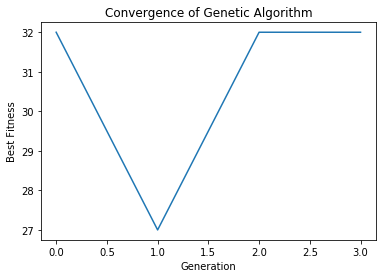

Best Solution: [1, 1, 1, 0, 0]
Best Fitness: 32


In [4]:
import random
import matplotlib.pyplot as plt
 
 
# Problem parameters
knapsack_capacity = 10
num_items = 5
population_size = 50
max_generations = 300
mutation_rate = 0.15
crossover_rate = 0.7
 
 
# Items: (Name, Weight, Value)
items = [
    ("A", 2, 10),
    ("B", 3, 7),
    ("C", 4, 15),
    ("D", 5, 10),
    ("E", 7, 3)
]
# Define your crossover and mutation schemes based on your name and roll number
name = "Deepti"  # Replace with your name
roll_number = "151"  # Replace with your roll number
 
 
# Crossover scheme
def crossover(parent1, parent2):
    return single_point_crossover(parent1, parent2)
 
    
def single_point_crossover(parent1, parent2):
    # Single-point crossover
    crossover_point = random.randint(1, num_items - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2
 
# Mutation scheme
def mutate(individual):
    # Implement mutation based on the specified scheme
    return flip_mutation(individual)

def flip_mutation(individual):
    
    # Flipping mutation
    mutation_point = random.randint(0, num_items - 1)
    individual[mutation_point] = 1 - individual[mutation_point]
    return individual
 
# Fitness function
def fitness(individual):
    total_weight = sum(items[i][1] for i in range(num_items) if individual[i] == 1)
    if total_weight > knapsack_capacity:
        return 0  # Invalid solution
    total_value = sum(items[i][2] for i in range(num_items) if individual[i] == 1)
    return total_value
 
  
 
# Initialize population
population = [random.choices([0, 1], k=num_items) for _ in range(population_size)]
best_fitness = 0
convergence = []
 
 
# Main loop
for generation in range(max_generations):
    # Evaluate fitness of each individual
    fitness_values = [fitness(individual) for individual in population]
 
    # Find the best solution in this generation
    best_index = fitness_values.index(max(fitness_values))
    best_individual = population[best_index]
    best_fitness = max(fitness_values)
    convergence.append(best_fitness)
 
    # Check termination criteria
    if generation > 0 and abs(convergence[-1] - convergence[-2]) < 0.001:
        break
 
 
    # Selection, crossover, and mutation
    new_population = []
    while len(new_population) < population_size:
        # Select parents using tournament selection
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        if fitness(parent1) > fitness(parent2):
            selected_parent = parent1
        else:
            selected_parent = parent2
 
 
        # Apply crossover
        if random.random() < crossover_rate:
            child1, child2 = crossover(selected_parent, random.choice(population))
        else:
            child1, child2 = selected_parent, random.choice(population)
 
 
        # Apply mutation
        child1 = mutate(child1)
        child2 = mutate(child2)
 
 
        new_population.extend([child1, child2])
 
 
    population = new_population
 
 
# Plot convergence graph
plt.plot(range(len(convergence)), convergence)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Convergence of Genetic Algorithm")
plt.show()
# plt.plot(generations, best_fitness_values)
# plt.xlabel("Generation")
# plt.ylabel("Best Fitness Value")
# plt.title("Convergence Graph")
# plt.show()
 
# Print the best solution and its fitness
print("Best Solution:", best_individual)
print("Best Fitness:", best_fitness)